#Final Project- Natural Language Processing with Disaster Tweets

##Installing and importing necessary libraries

In [1]:
pip install pandas scikit-learn

In [2]:
pip install nltk

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

In [4]:
# Load the training data
train_data = pd.read_csv('train.csv')

# Display the first few rows of the training data
print(train_data.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [5]:
# Load the test data
test_data = pd.read_csv('test.csv')

# Display the first few rows of the test data
print(test_data.head())


   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
# Check the shape of the training and test data
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Check for missing values
print("Missing values in training data:\n", train_data.isnull().sum())
print("Missing values in test data:\n", test_data.isnull().sum())

# Check the distribution of the target variable in the training data
print("Target variable distribution:\n", train_data['target'].value_counts())


Training data shape: (7613, 5)
Test data shape: (3263, 4)
Missing values in training data:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Missing values in test data:
 id             0
keyword       26
location    1105
text           0
dtype: int64
Target variable distribution:
 0    4342
1    3271
Name: target, dtype: int64


In [7]:
pip install nltk


In [8]:
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_text)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    train_data['text'], train_data['target'], test_size=0.2, random_state=42
)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


I Used natural language processing (NLP) techniques, such as text preprocessing and tokenization, using the nltk library. Specifically, the preprocess_text function performs the following NLP-related tasks:

Tokenization: Splits the text into individual words using the word_tokenize function from the nltk.tokenize module.

Stopword Removal: Removes common English stop words (e.g., "the," "is," "and") to focus on meaningful words.

We'll use the nltk library for tokenization and remove common English stop words. I'll also add an option for n-gram features in the TF-IDF vectorizer, which can capture word sequences.

In [9]:
# Apply text preprocessing to the training and validation sets
X_train = X_train.apply(preprocess_text)
X_valid = X_valid.apply(preprocess_text)

# Create a TF-IDF vectorizer with n-gram features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)

# Initialize and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the validation set
predictions = model.predict(X_valid_tfidf)

I've added the preprocess_text function, which tokenizes the text and removes stop words using NLTK. Additionally, I modified the TF-IDF vectorizer to include n-gram features by setting ngram_range=(1, 2). This allows the model to capture not only individual words but also pairs of consecutive words.


In [10]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_valid, predictions))
print("F1 Score:", f1_score(y_valid, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       874
           1       0.80      0.71      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

F1 Score: 0.7520525451559934



The model has a reasonable performance with an overall accuracy of 80%.

The F1-score for Class 1 (Disaster Tweet) is 0.75, indicating a good balance between precision and recall. However, there's room for improvement, especially in terms of recall for Class 1.

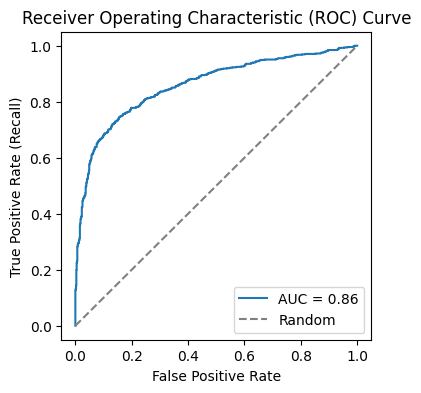

In [11]:
predictions_proba = model.predict_proba(X_valid_tfidf)[:, 1]  # Predict probabilities for class 1

# ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_valid, predictions_proba)
roc_auc = roc_auc_score(y_valid, predictions_proba)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

An AUC value of 0.86 indicates that the model has good discriminatory power in distinguishing between positive and negative instances. The higher the AUC, the better the model's ability to rank true positives higher than false positives across various probability thresholds. In this case, an AUC of 0.86 suggests a strong performance in terms of the receiver operating characteristic.

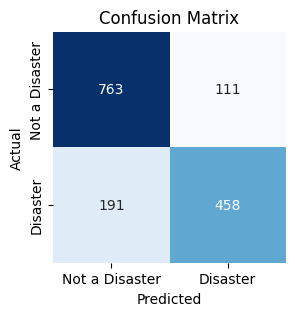

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, predictions)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not a Disaster', 'Disaster'], yticklabels=['Not a Disaster', 'Disaster'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# Flatten the confusion matrix into a 1D array
conf_matrix_flat = conf_matrix.flatten()

# Print the flattened confusion matrix
print("Flattened Confusion Matrix:")
print(conf_matrix_flat)

Flattened Confusion Matrix:
[763 111 191 458]


In [15]:
# Flatten the confusion matrix into a 1D array
conf_matrix_flat = conf_matrix.flatten()

# Extract values for tn, fn, fp, tp
tn, fp, fn, tp = conf_matrix_flat

# Print the values
print("True Negatives (tn):", tn)
print("False Negatives (fn):", fn)
print("True Positives (tp):", tp)
print("False Positives (fp):", fp)


True Negatives (tn): 763
False Negatives (fn): 191
True Positives (tp): 458
False Positives (fp): 111


True Negatives (TN): 763, that is, number of instances correctly predicted as "Not a Disaster Tweet."
False Negatives (FN): 191, that is, number of instances incorrectly predicted as "Not a Disaster Tweet" when they are actually "Disaster Tweets."
True Positives (TP): 458, that is, number of instances correctly predicted as "Disaster Tweets."
False Positives (FP): 111, that is, number of instances incorrectly predicted as "Disaster Tweets" when they are actually "Not a Disaster Tweet."


True Positives (TP): The model correctly predicted 458 instances as disaster tweets. This indicates the model's ability to correctly identify tweets related to a real disaster.

True Negatives (TN): The model correctly predicted 763 instances as non-disaster tweets. This indicates the model's ability to correctly identify tweets that are not related to a disaster.

The low counts of FP and FN indicate a balanced performance, suggesting that the model is making relatively few mistakes in both falsely identifying non-disaster tweets as disasters (FP) and falsely identifying disaster tweets as non-disasters (FN).

In [16]:
# Values from the confusion matrix
tn, fp, fn, tp = 763, 111, 191, 458

# Calculate Precision and Recall
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.804920913884007
Recall: 0.7057010785824345


Precision (0.805): This indicates that out of all instances predicted as disaster tweets, approximately 80.5% were indeed about a real disaster. It measures the accuracy of positive predictions.

Recall (0.706): This indicates that the model correctly identified about 70.6% of all actual disaster tweets. It measures the ability of the model to capture all relevant instances of disasters.

In summary, the model has a relatively high precision, meaning that when it predicts a tweet as a disaster, it is often correct. However, the recall is moderate, indicating that there is room for improvement in capturing a higher proportion of actual disaster tweets.

In [17]:
# Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_data['text'])

# Make predictions on the test set
test_predictions = model.predict(X_test_tfidf)

# Create a submission DataFrame
submission = pd.DataFrame({'id': test_data['id'], 'target': test_predictions})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)


#Fine tuning the model

To further tune our logistic regression model, we can use techniques like grid search or randomized search to find the best hyperparameters. We used grid search with GridSearchCV from scikit-learn.

Here, we're searching over different values of the regularization parameter (C). The grid search will evaluate each combination of these parameters using cross-validation and select the best combination.

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
logreg = LogisticRegression(random_state=42)

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
best_predictions = best_model.predict(X_valid_tfidf)

# Evaluate the best model
print("Classification Report for the Best Model:")
print(classification_report(y_valid, best_predictions))
print("F1 Score for the Best Model:", f1_score(y_valid, best_predictions))


Best Hyperparameters: {'C': 1}
Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       874
           1       0.80      0.71      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

F1 Score for the Best Model: 0.7520525451559934


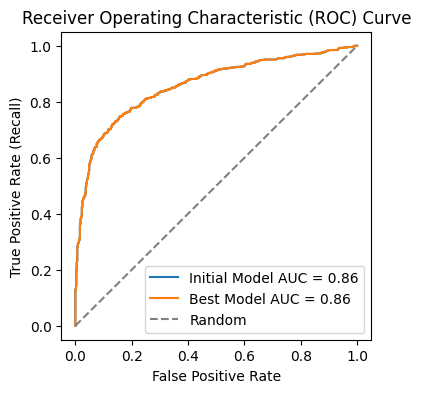

In [19]:
# Get the predicted probabilities for the positive class from the best model
best_predictions_proba = best_model.predict_proba(X_valid_tfidf)[:, 1]

# ROC-AUC curve for the best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_valid, best_predictions_proba)
roc_auc_best = roc_auc_score(y_valid, best_predictions_proba)

# Plot ROC-AUC curve for both the initial and best models
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f'Initial Model AUC = {roc_auc:.2f}')
plt.plot(fpr_best, tpr_best, label=f'Best Model AUC = {roc_auc_best:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()


#Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Initialize random forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=-1
)

# Fit the randomized search to the data
random_search_rf.fit(X_train_tfidf, y_train)

# Display the optimal parameters
print("Optimal Parameters:", random_search_rf.best_params_)

# Get the optimal model
optimal_rf_model = random_search_rf.best_estimator_

# Make predictions on the validation set using the optimal model
optimal_rf_predictions = optimal_rf_model.predict(X_valid_tfidf)

# Evaluate the optimal model
print("Optimal Random Forest Model - Classification Report:")
print(classification_report(y_valid, optimal_rf_predictions))
print("Optimal Random Forest Model - F1 Score:", f1_score(y_valid, optimal_rf_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Optimal Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}
Optimal Random Forest Model - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       874
           1       0.80      0.68      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Optimal Random Forest Model - F1 Score: 0.735440931780366


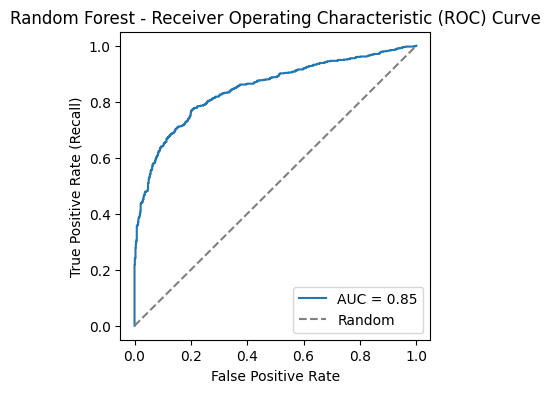

In [34]:

# Display the AUC-ROC curve
rf_predictions_proba = optimal_rf_model.predict_proba(X_valid_tfidf)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_valid, rf_predictions_proba)
rf_roc_auc = roc_auc_score(y_valid, rf_predictions_proba)

plt.figure(figsize=(4, 4))
plt.plot(rf_fpr, rf_tpr, label=f'AUC = {rf_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Random Forest - Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

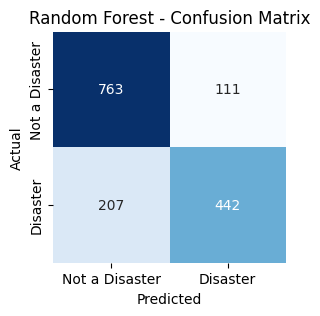

In [22]:
# Display the confusion matrix
rf_conf_matrix = confusion_matrix(y_valid, optimal_rf_predictions)
plt.figure(figsize=(3, 3))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not a Disaster', 'Disaster'], yticklabels=['Not a Disaster', 'Disaster'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [23]:

from sklearn.metrics import precision_score, recall_score
# Calculate precision and recall
rf_precision = precision_score(y_valid, optimal_rf_predictions)
rf_recall = recall_score(y_valid, optimal_rf_predictions)

print("Random Forest - Precision:", rf_precision)
print("Random Forest - Recall:", rf_recall)

Random Forest - Precision: 0.7992766726943942
Random Forest - Recall: 0.6810477657935285


#Multinomial Naive Bayes classifier

Another popular classifier for NLP tasks is the Multinomial Naive Bayes classifier. It's particularly well-suited for text classification problems.

Multinomial Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       874
           1       0.84      0.66      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.81      0.80      0.80      1523

Multinomial Naive Bayes - F1 Score: 0.7407407407407407


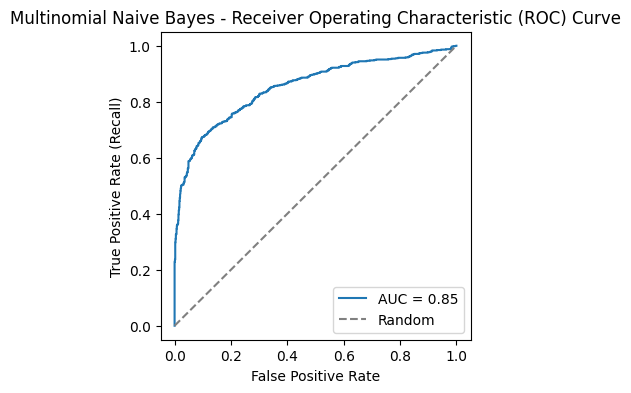

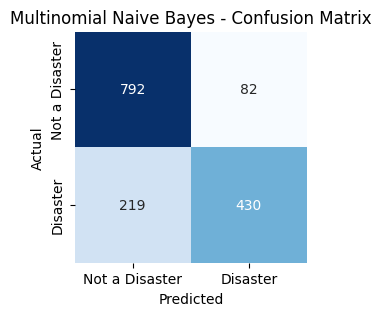

Multinomial Naive Bayes - Precision: 0.83984375
Multinomial Naive Bayes - Recall: 0.662557781201849


In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score

# Initialize Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Fit the model to the training data
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the validation set
nb_predictions = nb_model.predict(X_valid_tfidf)

# Evaluate the model
print("Multinomial Naive Bayes - Classification Report:")
print(classification_report(y_valid, nb_predictions))
print("Multinomial Naive Bayes - F1 Score:", f1_score(y_valid, nb_predictions))

# Display the AUC-ROC curve
nb_predictions_proba = nb_model.predict_proba(X_valid_tfidf)[:, 1]
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_valid, nb_predictions_proba)
nb_roc_auc = roc_auc_score(y_valid, nb_predictions_proba)

plt.figure(figsize=(4, 4))
plt.plot(nb_fpr, nb_tpr, label=f'AUC = {nb_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Multinomial Naive Bayes - Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()
print()

# Display the confusion matrix
nb_conf_matrix = confusion_matrix(y_valid, nb_predictions)
plt.figure(figsize=(3, 3))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not a Disaster', 'Disaster'], yticklabels=['Not a Disaster', 'Disaster'])
plt.title('Multinomial Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate precision and recall
nb_precision = precision_score(y_valid, nb_predictions)
nb_recall = recall_score(y_valid, nb_predictions)

print("Multinomial Naive Bayes - Precision:", nb_precision)
print("Multinomial Naive Bayes - Recall:", nb_recall)


#Experimenting with Different text preprocessing technique for the logistic model

Lemmatization reduces words to their base or root form. This can be useful for reducing the dimensionality of the feature space.

In [25]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the WordNet resource (you only need to do this once)
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text with lemmatization
def preprocess_text_with_lemmatization(text):
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    # Lemmatize the words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_text]
    return ' '.join(lemmatized_words)

# Apply text preprocessing with lemmatization to the training and validation sets
X_train_lemmatized = X_train.apply(preprocess_text_with_lemmatization)
X_valid_lemmatized = X_valid.apply(preprocess_text_with_lemmatization)

# Create a TF-IDF vectorizer with n-gram features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf_lemmatized = tfidf_vectorizer.fit_transform(X_train_lemmatized)
X_valid_tfidf_lemmatized = tfidf_vectorizer.transform(X_valid_lemmatized)

# Initialize and train a logistic regression model
model_lemmatized = LogisticRegression(random_state=42)
model_lemmatized.fit(X_train_tfidf_lemmatized, y_train)

# Make predictions on the validation set
predictions_lemmatized = model_lemmatized.predict(X_valid_tfidf_lemmatized)

# Evaluate the model with lemmatization
print("Classification Report (with lemmatization):")
print(classification_report(y_valid, predictions_lemmatized))
print("F1 Score (with lemmatization):", f1_score(y_valid, predictions_lemmatized))


[nltk_data] Downloading package wordnet to /root/nltk_data...


Classification Report (with lemmatization):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       874
           1       0.81      0.70      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

F1 Score (with lemmatization): 0.750413223140496


#Exploratory Data Analysis

In [26]:
pip install wordcloud

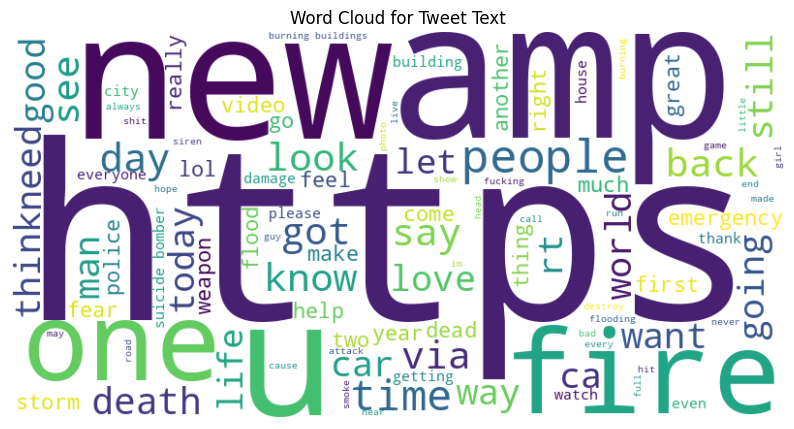

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweet text into a single string
all_text = ' '.join(X_train)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=100, background_color='white').generate(all_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tweet Text')
plt.show()


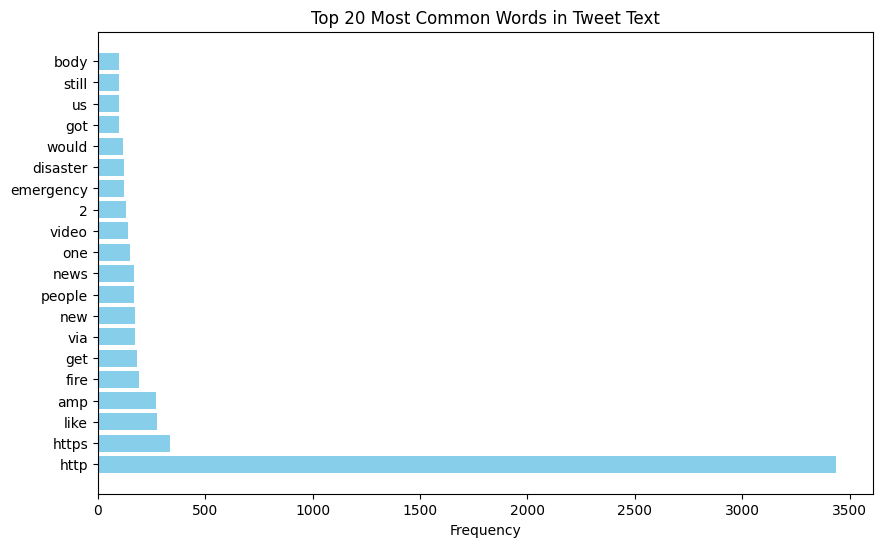

In [28]:
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Tokenize and preprocess the text
all_tokens = [word for tweet in X_train for word in word_tokenize(preprocess_text(tweet))]

# Calculate the frequency distribution
freq_dist = FreqDist(all_tokens)

# Plot the top N most common words
top_words = freq_dist.most_common(20)  # You can adjust the number of top words to display
words, frequencies = zip(*top_words)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words in Tweet Text')
plt.show()


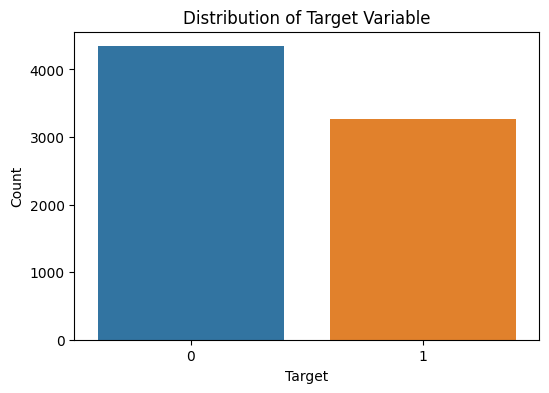

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train_data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


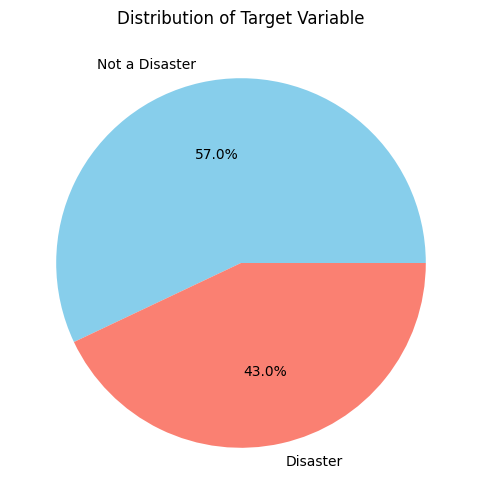

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(train_data['target'].value_counts(), labels=['Not a Disaster', 'Disaster'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable')
plt.show()


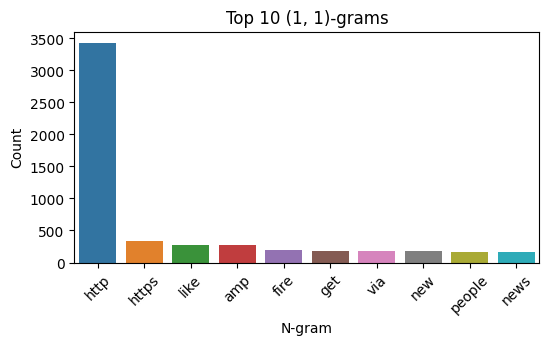

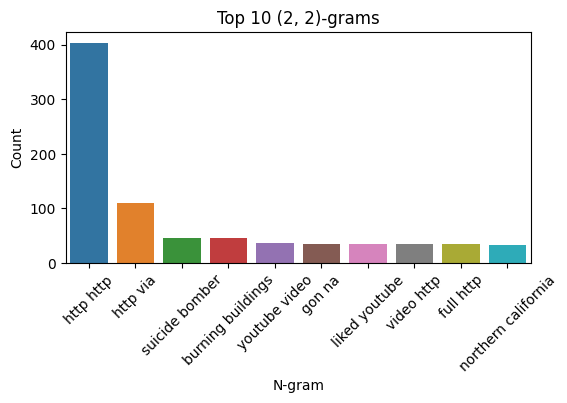

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot the most common n-grams
def plot_top_ngrams(text, ngram_range=(1, 2), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    ngrams = vectorizer.fit_transform(text)
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]

    plt.figure(figsize=(6, 3))
    sns.barplot(x=[word[0] for word in ngrams_freq], y=[word[1] for word in ngrams_freq])
    plt.title(f'Top {top_n} {ngram_range}-grams')
    plt.xlabel('N-gram')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Plot top 10 unigrams and bigrams
plot_top_ngrams(X_train, ngram_range=(1, 1), top_n=10)
print()
plot_top_ngrams(X_train, ngram_range=(2, 2), top_n=10)


N-grams are contiguous sequences of n items (words in the context of text analysis). In the context of natural language processing (NLP) and text analysis, n-grams are used to understand the relationships between words in a sequence. The most common types of n-grams are unigrams (1-grams), bigrams (2-grams), trigrams (3-grams), and so on.

Brief explanation of n-gram analysis:

Unigrams (1-grams):

Unigrams are individual words in a text.
Analyzing unigrams helps understand the most frequently occurring words in the dataset.

Bigrams (2-grams):

Bigrams consist of pairs of consecutive words.
Analyzing bigrams provides insights into common word pairs or phrases.

Purpose of N-gram Analysis:

Identifying Key Phrases: Discovering frequently occurring phrases that might be relevant to the context.
Understanding Context: Recognizing common language patterns and expressions.
Feature Extraction: Generating features for machine learning models based on the occurrence of n-grams.